In [1]:
# importing the necessary libraries and packages we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
df=pd.read_csv('train.csv')

In [3]:
# checking the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# checking the summary of statistics
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.shape # checking the shape of our dataset

(550068, 12)

The dataset is super large

In [6]:
df.info() # checking the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.isnull().sum() # checking the null values of the dataset

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Treating the missing or null values

In [8]:
# we will drop Product_category_3 column as there are so many missing values present in it.
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [9]:
#Impute the missing values of Product_Category_2 by mean
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [10]:
#checking the dataset again for missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

There are no null values present in the Data set now

# Data Visualization

<AxesSubplot:xlabel='Age', ylabel='count'>

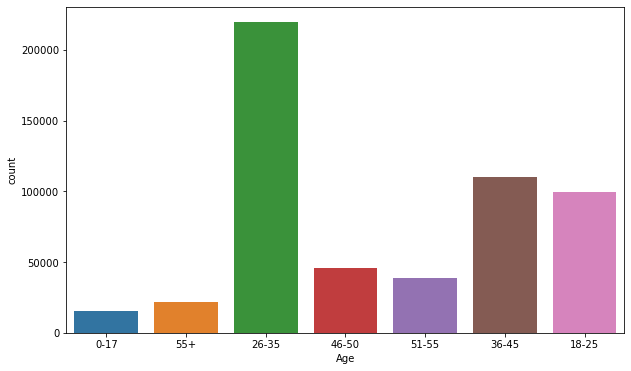

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age')
# count the occurance based on age

<AxesSubplot:xlabel='Gender', ylabel='count'>

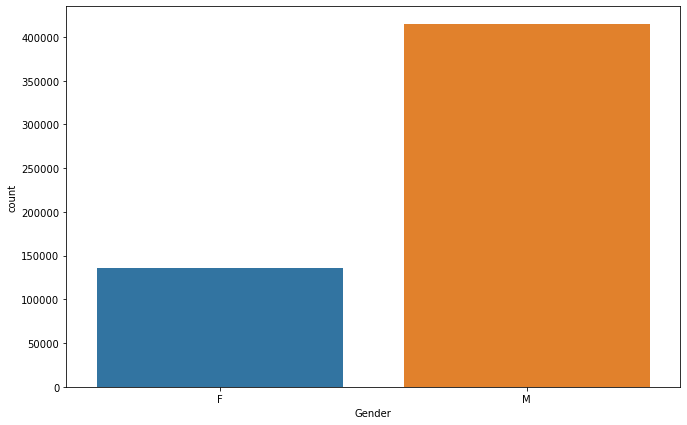

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(data=df, x='Gender')
# count the occurance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

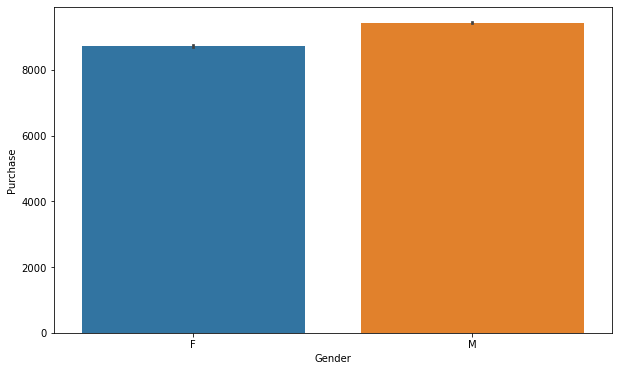

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Purchase',data=df)
# Male purchased more than Female

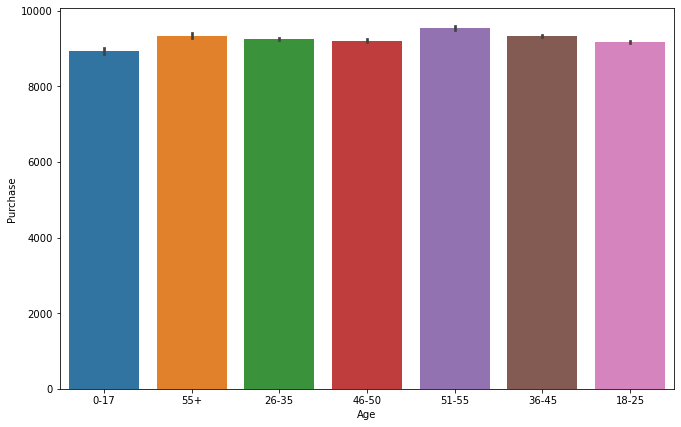

In [14]:
plt.figure(figsize=(11, 7))
sns.barplot(x='Age',y='Purchase',data=df);
# The age range 55-55 purchase more followed by 36-45

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

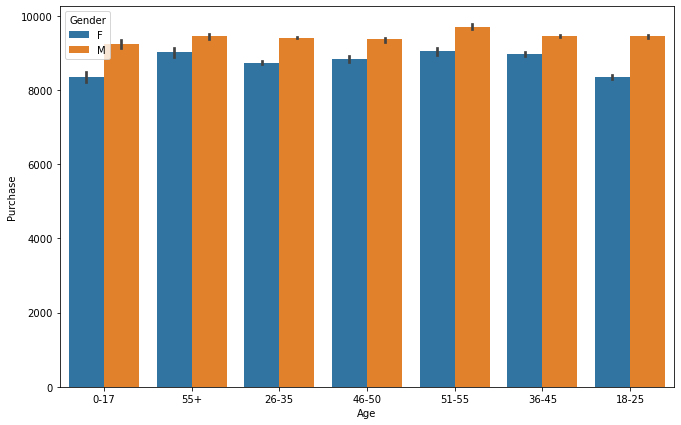

In [15]:
plt.figure(figsize=(11,7))
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)
# So the Male bought more than female of all ages


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

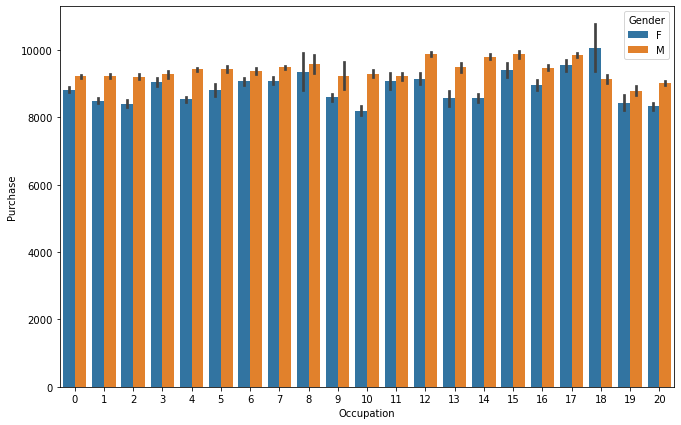

In [16]:
plt.figure(figsize=(11,7))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
# Male purchased more than Female other than occupation 18 where Female purched more than Male

<AxesSubplot:>

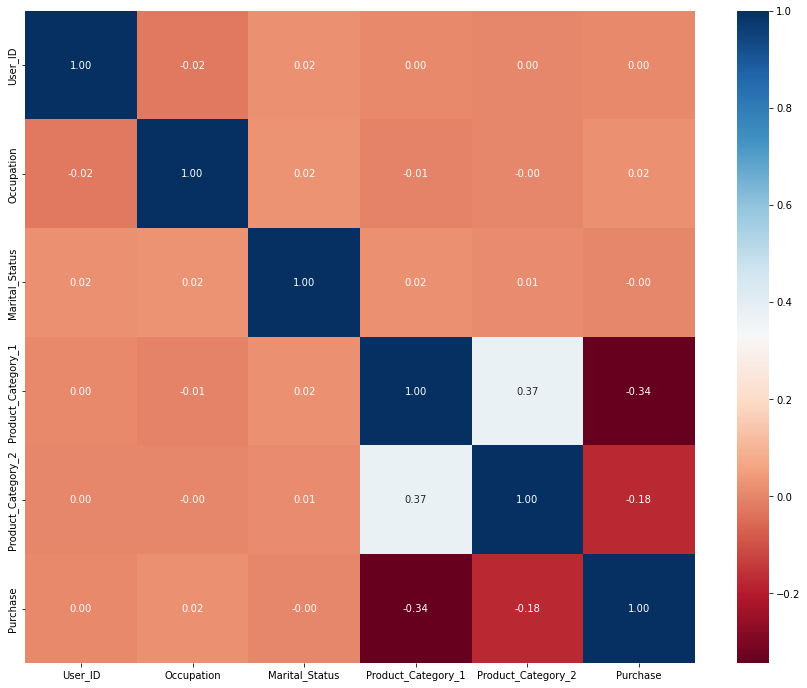

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt=".2f")

# Checking the Outliers in our Dataset

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

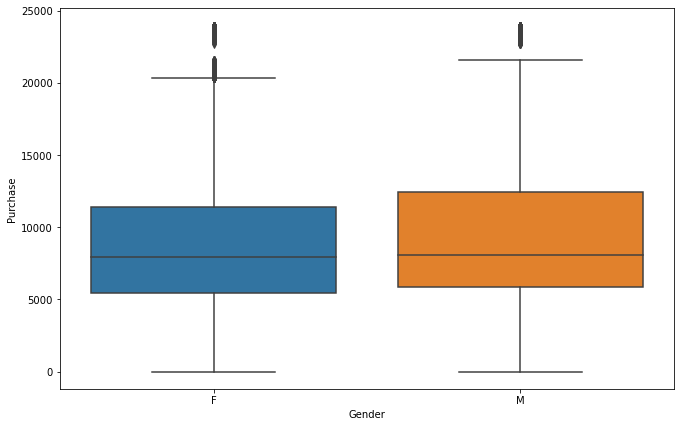

In [18]:
plt.figure(figsize=(11,7))
sns.boxplot(x='Gender',y='Purchase',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

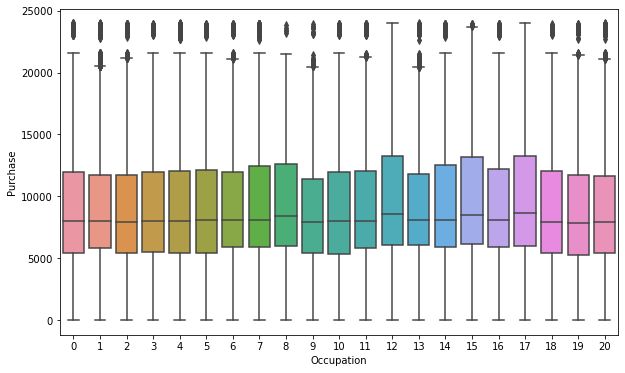

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Occupation", y="Purchase",data=df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

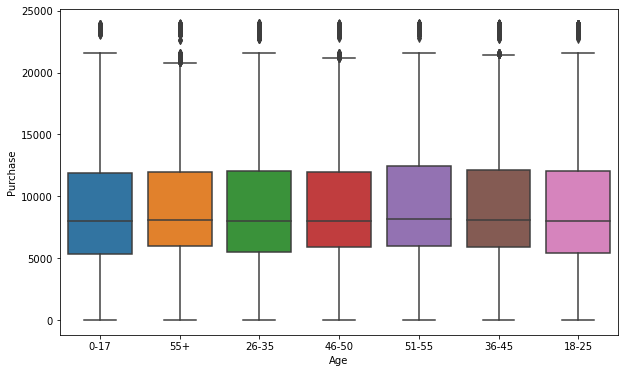

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age", y="Purchase")

So, we notice that there are outliers present in are our Dataset which will effect performance of ML models

# Data Prepocessing and scalling

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


We observe that our dataset contains categorical variables which need to be encoded

In [22]:
# The following codes will encode our dataset to transform object(categorical variables)
lb_enc=LabelEncoder()
for i in df:
    df[i]=lb_enc.fit_transform(df[i])

In [23]:
df.info() # checking dataset after encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Product_ID                  550068 non-null  int64
 2   Gender                      550068 non-null  int64
 3   Age                         550068 non-null  int64
 4   Occupation                  550068 non-null  int64
 5   City_Category               550068 non-null  int64
 6   Stay_In_Current_City_Years  550068 non-null  int64
 7   Marital_Status              550068 non-null  int64
 8   Product_Category_1          550068 non-null  int64
 9   Product_Category_2          550068 non-null  int64
 10  Purchase                    550068 non-null  int64
dtypes: int64(11)
memory usage: 46.2 MB


In [24]:
df.head() # checking first five entries

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,672,0,0,10,0,2,0,2,8,6702
1,0,2376,0,0,10,0,2,0,0,4,12121
2,0,852,0,0,10,0,2,0,11,8,586
3,0,828,0,0,10,0,2,0,11,13,494
4,1,2734,1,6,16,2,4,0,7,8,6301


We notice that there are no object type data present in our dataset after encoding.

In [25]:
# Before Standardization,feauture and prediction target is determined
X = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [26]:
#Standardization of our training set is required beacause of different scales and outliers
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()
X=pd.DataFrame(sclar.fit_transform(X),columns=df.columns.drop('Purchase')) 
# only fit transform will return a numpy array , so we need to convert them into pandas dataframe

In [27]:
X.head() # X data set is checked after applying Standardization 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,-1.749661,-1.022993,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.049982
1,-1.749661,0.660469,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.921464
2,-1.749661,-0.845162,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-0.049982
3,-1.749661,-0.868873,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.039371
4,-1.749068,1.014154,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.049982


# Spilitting our dataset into train and test

In [28]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [29]:
X_train.head() # checking X_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
500304,1.169518,0.282085,0.572570,-0.366739,1.214734,-1.371516,-1.441258,-0.833018,0.659449,1.039371
16861,-0.234892,0.802733,0.572570,-0.366739,-1.084943,-0.056090,0.109801,1.200454,2.691862,-0.049982
113230,1.420496,-1.095113,0.572570,-1.105493,-0.165072,-1.371516,-0.665728,-0.833018,0.659449,1.475112
434978,-1.169979,-0.521116,0.572570,-0.366739,-1.238255,-1.371516,-0.665728,-0.833018,-1.118912,1.475112
385516,1.336243,-1.129691,-1.746513,0.372015,-0.778319,1.259336,0.885331,1.200454,-0.610809,-1.357205


In [30]:
y_train.head() # checking y_train

500304     2781
16861      9684
113230     6386
434978     2895
385516    11237
Name: Purchase, dtype: int64

# Trainig and Testing several ML Models

In [31]:
# training Linear regression model
lnr=LinearRegression()
lnr.fit(X_train,y_train)

LinearRegression()

In [32]:
pred_y=lnr.predict(X_test) # predicting on X_test

In [33]:
# checking the performance of our trained model
score=r2_score(y_test,pred_y)
mae=mean_absolute_error(y_test,pred_y)
mse=mean_squared_error(y_test,pred_y)
rmse=(np.sqrt(mean_squared_error(y_test,pred_y)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.13154673866669042
mean_absolute_error:  2931.5761227139333
mean_squared_error:  14577215.615323717
root_mean_squared_error:  3818.011997797246


By analysing the above scores and erros, we can see that our model performance is not good and convincing. So, we try to train another model.

In [34]:
#training DecisionTreeRegressor model
dt_regr=DecisionTreeRegressor(max_depth=9)
dt_regr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [35]:
pred_y=dt_regr.predict(X_test) #predicting X_test

In [36]:
# checking the performance of our trained model
mae=mean_absolute_error(y_test,pred_y)
mse=mean_squared_error(y_test,pred_y)
rmse=(np.sqrt(mean_squared_error(y_test,pred_y)))
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

mean_absolute_error:  1781.901683073254
mean_squared_error:  5535644.16814237
root_mean_squared_error:  2352.7949694230415


The lower MAE,MSE, and RMSE value indicate that DecisionTreeRegressor model is performing better than previous model.

In [37]:
#training RandomForestRegressor model
rf_rger=RandomForestRegressor().fit(X_train,y_train)

In [38]:
pred_y=rf_rger.predict(X_test) # predicting on X_test

In [39]:
# checking the performance of our trained model
mae=mean_absolute_error(y_test,pred_y)
mse=mean_squared_error(y_test,pred_y)
rmse=(np.sqrt(mean_squared_error(y_test,pred_y)))
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)


mean_absolute_error:  1681.6976109707252
mean_squared_error:  5119797.264867936
root_mean_squared_error:  2262.696900795141


Wow! The performance of our model increased as we have more lower MAE,MSE and RMSE value.

# Applying extreme gradiant boosting (XGboost)  to build and optimize models

In [40]:
from xgboost import XGBRegressor

In [41]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
pred_xgb=pd.DataFrame(xgb_model.predict(X_test))
pred_xgb.head()

,0
0,11395.214844
1,12441.227539
2,6527.611328
3,8582.130859
4,10511.822266


In [43]:
# checking the performance of our trained model
mae=mean_absolute_error(y_test,pred_xgb)
mse=mean_squared_error(y_test,pred_xgb)
rmse=(np.sqrt(mean_squared_error(y_test,pred_xgb)))
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

mean_absolute_error:  1608.0949168571171
mean_squared_error:  4547003.890574292
root_mean_squared_error:  2132.370486236923


Excellent! even much more lower MAE,MSE, and RMSE value indicate that our XGBRegressor even preformed better than RandomForest model. The best model amongst all other models applied.

# Now we will use another set of data to predict purchase by using the best trained model 

In [44]:
test_df=pd.read_csv('test.csv') # checking the test dataset(another set of data)

In [45]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [46]:
test_df.isnull().sum() # checking the missing values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [47]:
# we will drop Product_category_3 column as there are so many missing values present in it.
test_df.drop(['Product_Category_3'],axis=1,inplace=True)

In [48]:
#Impute the missing values of Product_Category_2 by mean
test_df['Product_Category_2']=test_df['Product_Category_2'].fillna(test_df['Product_Category_2'].mean())

In [49]:
test_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [50]:
# The following codes will encode our test_dataset to transform object(categorical variables)
lb_enc=LabelEncoder()
for i in test_df:
    test_df[i]=lb_enc.fit_transform(test_df[i])

In [51]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,3,1144,1,4,7,1,2,1,0,10
1,8,994,1,2,17,2,0,0,2,3
2,9,2672,0,3,1,1,4,1,4,13
3,9,1299,0,3,1,1,4,1,3,7
4,10,519,0,2,1,2,1,0,3,3


In [52]:
#Standardization of our test dataset is required beacause of different scales and outliers
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()
test_df=pd.DataFrame(sclar.fit_transform(test_df),columns=test_df.columns[:]) 
# only fit transform will return a numpy array , so we need to convert them into pandas dataframe

In [53]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,-1.749284,-0.501114,0.573575,1.112316,-0.166445,-0.056309,0.110432,1.199419,-1.144571,0.381762
1,-1.746316,-0.656149,0.573575,-0.368480,1.367031,1.261046,-1.443264,-0.833737,-0.609292,-1.134428
2,-1.745722,1.078181,-1.743450,0.371918,-1.086530,-0.056309,1.664128,1.199419,-0.074014,1.031558
3,-1.745722,-0.340910,-1.743450,0.371918,-1.086530,-0.056309,1.664128,1.199419,-0.341653,-0.268034
4,-1.745128,-1.147095,-1.743450,-0.368480,-1.086530,1.261046,-0.666416,-0.833737,-0.341653,-1.134428


In [54]:
# Since XGBRegressor model performed best compared to other models, we used it to predict our new test dataset
pred_test=xgb_model.predict(test_df) 

In [55]:
predict=pd.DataFrame(pred_test,columns=['Purchase'])
predict.head()

,Purchase
0,10048.964844
1,9244.455078
2,5070.861328
3,2054.853027
4,1912.348877


In [56]:
DataFrame=pd.read_csv('test.csv')
DataFrame.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [57]:
# selecting only Used_ID and Product_ID from the test dataset
data_ID=DataFrame[['User_ID','Product_ID']]
data_ID.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [58]:
# Predictions are saved as DataFrame with User_ID and Product_ID columns
predictions=data_ID.join(predict)
predictions.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10048.964844
1,1000009,P00113442,9244.455078
2,1000010,P00288442,5070.861328
3,1000010,P00145342,2054.853027
4,1000011,P00053842,1912.348877


In [59]:
# The prediction is saved into csv data format
predictions.to_csv('BlackFridayPredictions.csv', index=False)

# Thank You so much!